#Ejercicio 1:

Descripción:

En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

Dataset:

El dataset proporcionado incluye las siguientes variables para cada estudiante:

Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.

Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.

Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).

Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.

Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.

Además, el dataset incluye la variable objetivo:

Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

Objetivo:

Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

Entrega:

La entrega debe incluir:

Código fuente de la solución implementada en Google Colab, que incluya:
Análisis previo y preprocesamiento del set de datos.
Definición y entrenamiento del modelo.
Resultados de la evaluación del modelo, incluyendo métricas de desempeño y visualizaciones relevantes.
Nota: el código debe estar debidamente documentado con comentarios explicativos para que el trabajo sea fácilmente comprensible para otros revisores.


In [ ]:
!pip install -q gdown

In [ ]:
import gdown

# TP1-1-student_performance.zip
gdown.download('https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc')

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 14.8MB/s]


'TP1-1-student_performance.zip'

In [ ]:
import zipfile

with zipfile.ZipFile('TP1-1-student_performance.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-1')

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

In [ ]:
df = pd.read_csv('TP1-1/Student_Performance.csv')

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


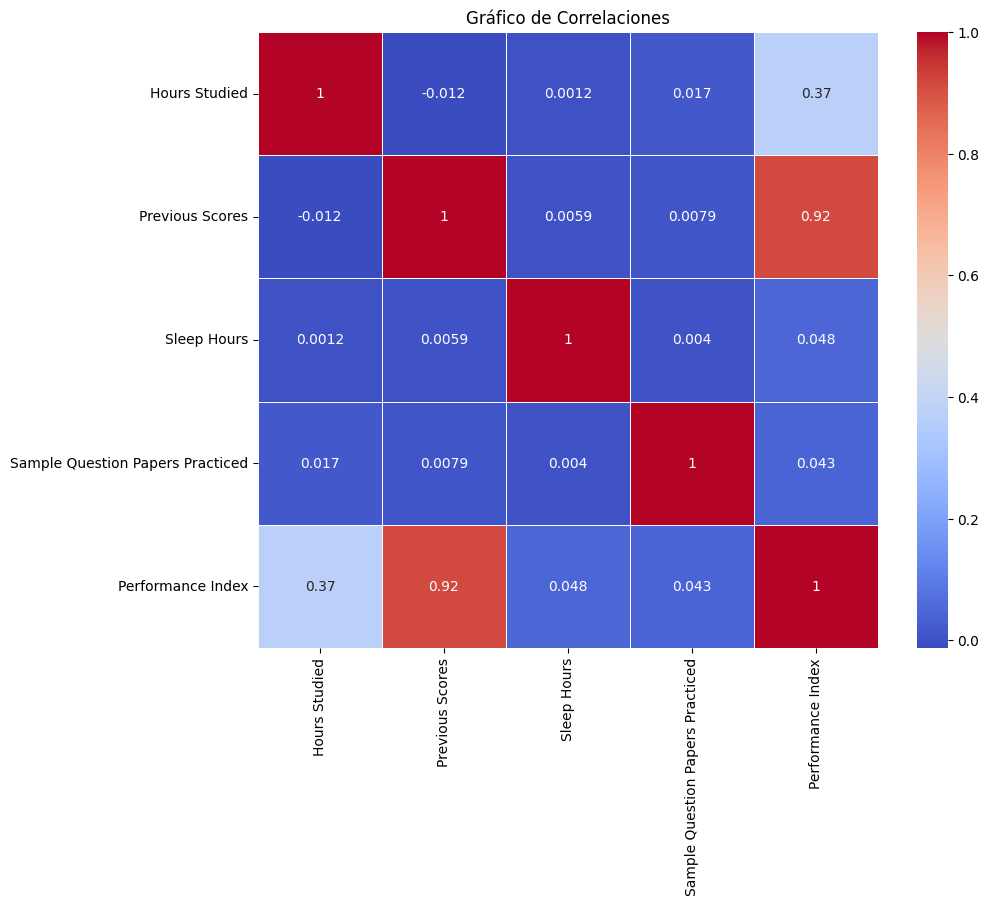

In [ ]:
# Calcula la matriz de correlación
data_no_ea = df.drop(columns=['Extracurricular Activities'])
correlation_matrix = data_no_ea.corr()

# Creo un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Gráfico de Correlaciones")

plt.show()

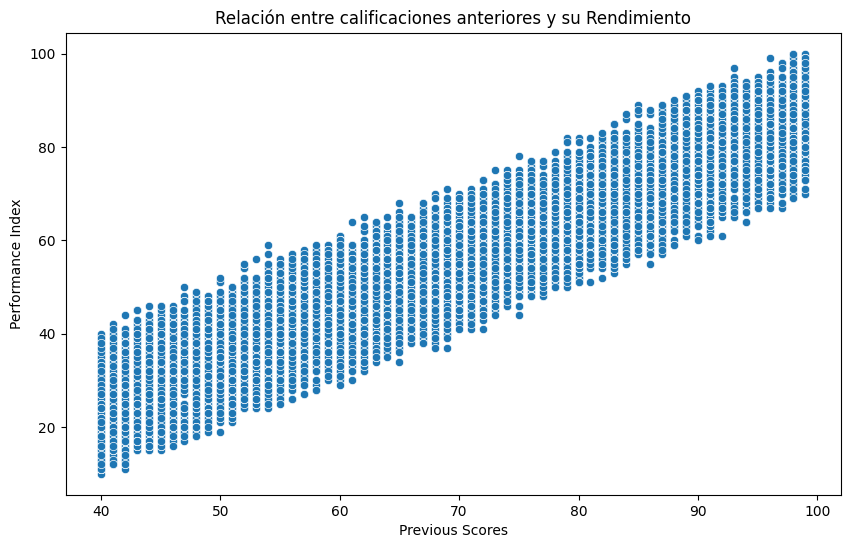

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df)
plt.title('Relación entre calificaciones anteriores y su Rendimiento')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

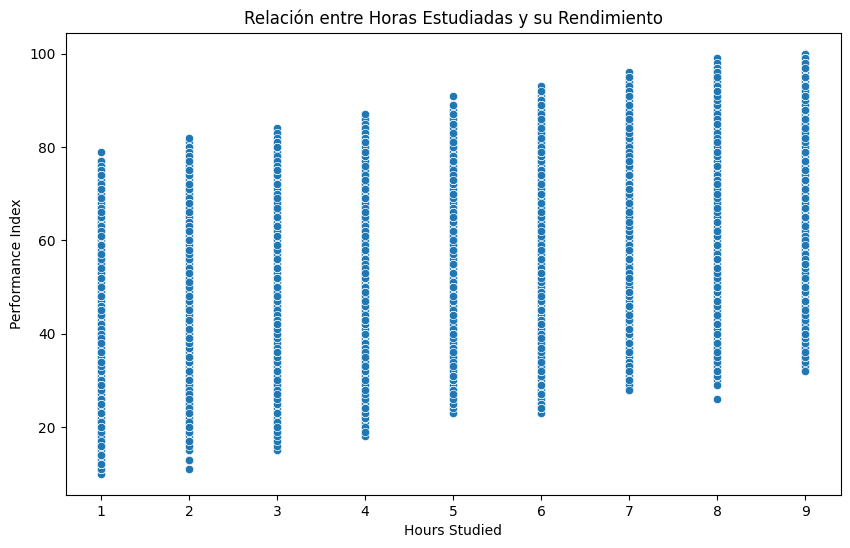

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df)
plt.title('Relación entre Horas Estudiadas y su Rendimiento')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
X = df.drop(columns=['Performance Index'])
y_reg = df['Performance Index']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
X_train_reg['Extracurricular Activities'] = X_train_reg['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_test_reg['Extracurricular Activities'] = X_test_reg['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
# Utilizamos el método StandardScaler de Scikit-Learn para estandarizar las variables
scaler = StandardScaler()

# Ajustar el scaler en el conjunto de entrenamiento y transformar tanto el conjunto de entrenamiento como el de prueba
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Convertir los arrays NumPy de vuelta en DataFrames manteniendo los índices y las columnas
X_train_reg_scaled_df = pd.DataFrame(X_train_reg_scaled, index=X_train_reg.index, columns=X_train_reg.columns)
X_test_reg_scaled_df = pd.DataFrame(X_test_reg_scaled, index=X_test_reg.index, columns=X_test_reg.columns)

In [ ]:
def r2_adjusted(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + K.epsilon())
    n = K.cast(K.shape(y_true)[0], dtype='float32')
    p = K.cast(K.shape(y_true)[1], dtype='float32')
    r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1 + K.epsilon())
    return r2_adjusted

In [ ]:
num_features = X.shape[1]
print(X.shape)

(10000, 5)


In [ ]:
# Definir el modelo
model = tf.keras.Sequential([
    # Capa de entrada
    tf.keras.layers.Dense(units=8, activation='relu', input_shape=(5,)),
    # Capas ocultas
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    # Capa de salida
    tf.keras.layers.Dense(units=1)  # No necesitamos especificar una función de activación para problemas de regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[[r2_adjusted]])

# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 48        
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_reg_scaled, y_train_reg, epochs=50, batch_size=128, validation_data=(X_test_reg_scaled, y_test_reg))

Epoch 1/50
63/63 [==============================] - 1s 14ms/step - loss: 53.8108 - r2_adjusted: 0.8506 - val_loss: 48.4050 - val_r2_adjusted: 0.8662
Epoch 2/50
63/63 [==============================] - 1s 9ms/step - loss: 47.6446 - r2_adjusted: 0.8677 - val_loss: 43.3016 - val_r2_adjusted: 0.8803
Epoch 3/50
63/63 [==============================] - 1s 10ms/step - loss: 42.4613 - r2_adjusted: 0.8819 - val_loss: 39.1000 - val_r2_adjusted: 0.8919
Epoch 4/50
63/63 [==============================] - 1s 8ms/step - loss: 38.1043 - r2_adjusted: 0.8942 - val_loss: 35.4283 - val_r2_adjusted: 0.9020
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 34.4280 - r2_adjusted: 0.9044 - val_loss: 32.2266 - val_r2_adjusted: 0.9109
Epoch 6/50
63/63 [==============================] - 1s 11ms/step - loss: 31.2818 - r2_adjusted: 0.9132 - val_loss: 29.5650 - val_r2_adjusted: 0.9183
Epoch 7/50
63/63 [==============================] - 1s 9ms/step - loss: 28.6017 - r2_adjusted: 0.9205 - val_l

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(X_test_reg_scaled)

mse = mean_squared_error(y_test_reg, predictions)
mae = mean_absolute_error(y_test_reg, predictions)
r2 = r2_score(y_test_reg, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2:",r2)

score = model.evaluate(X_test_reg_scaled, y_test_reg, verbose=0)
print('Test loss:', score[0])
print('Test R2 Adjusted:', score[1])

63/63 [==============================] - 0s 1ms/step
Mean Squared Error: 4.5895540288209045
Mean Absolute Error: 1.6919867219924927
R2: 0.9876153848855038
Test loss: 4.589554309844971
Test R2 Adjusted: 0.9860250353813171


      Real   Predicho
6252  51.0  54.727520
4684  20.0  23.843422
1731  46.0  47.113323
4742  28.0  32.312252
4521  41.0  42.933620
6340  59.0  58.980289
576   48.0  45.910145
5202  87.0  86.732201
6363  37.0  37.451817
439   73.0  72.127007


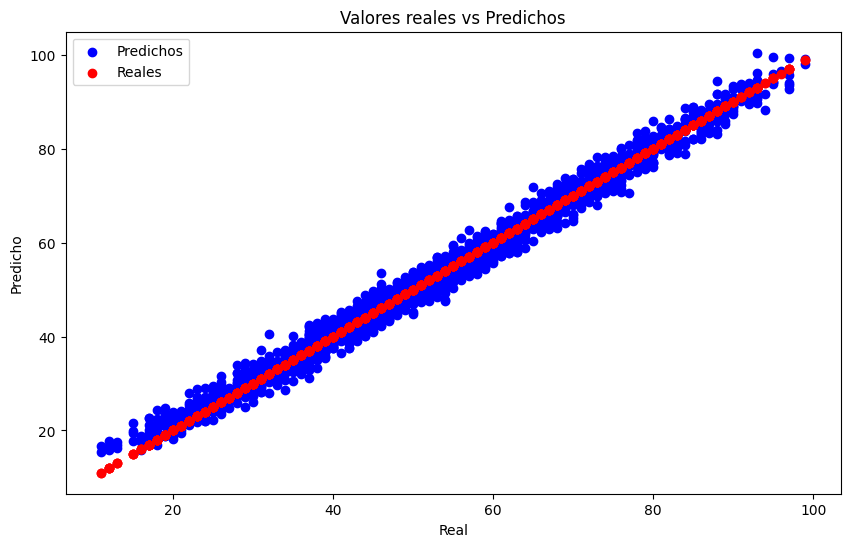

In [ ]:
# Crear un DataFrame con los valores reales y predichos
df_results = pd.DataFrame({'Real': y_test_reg, 'Predicho': predictions.flatten()})

# Mostrar los primeros 10 registros para verificar
print(df_results.head(10))

# Trama scatter plot de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(df_results['Real'], df_results['Predicho'], color='blue', label='Predichos')
plt.scatter(df_results['Real'], df_results['Real'], color='red', label='Reales')
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Valores reales vs Predichos')
plt.legend()
plt.show()
